In [42]:
import pandas as pd
import starbars

# 'project_id', 'ensemble_id', 'cell_line', 'region_id', 'gene_id', 'enh_id', 'dist_avg_dist', 'has_link'
distances_with_links_exp_4 = pd.read_parquet("./links/experiment_4/distances_with_links.parquet").rename({"dist_avg_dist": "avg_dist"}, axis=1)
distances_with_links_exp_4['type'] = 'nean'

distances_with_links_exp_5 = pd.read_parquet("./links/experiment_5/distances_with_links.parquet").rename({"dist_avg_dist": "avg_dist"}, axis=1)
distances_with_links_exp_5['type'] = 'deni'

distances_with_links = pd.read_parquet("./links/experiment_5/distances_with_links.parquet").rename({"dist_avg_dist": "avg_dist"}, axis=1)

# distances_with_links = pd.concat([distances_with_links_exp_4, distances_with_links_exp_5], ignore_index=True)

In [43]:
distances_with_links

,project_id,ensemble_id,cell_line,region_id,gene_id,enh_id,avg_dist,has_link
0,8k_models_project_GM12878,models3D_GM12878_Deni_models3D_GM12878_Deni_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:49823143-49824413,7.605638,False
1,8k_models_project_GM12878,models3D_GM12878_Deni_models3D_GM12878_Deni_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50012133-50013263,9.195414,False
2,8k_models_project_GM12878,models3D_GM12878_Deni_models3D_GM12878_Deni_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50492953-50494843,9.225644,False
3,8k_models_project_GM12878,models3D_GM12878_Deni_models3D_GM12878_Deni_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50795173-50796203,7.509095,False
4,8k_models_project_GM12878,models3D_GM12878_Deni_models3D_GM12878_Deni_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:51549141-51550061,8.262490,False
...,...,...,...,...,...,...,...,...
2491185,8k_models_project_HFFC6,models3D_HFFC6_Deni_models3D_HFFC6_Deni_result...,HFFC6,chr9:132231282-138394717,ENSG00000289701,chr9:134213504-134217374,12.972232,False
2491186,8k_models_project_HFFC6,models3D_HFFC6_Deni_models3D_HFFC6_Deni_result...,HFFC6,chr9:132231282-138394717,ENSG00000289701,chr9:134488114-134489684,14.046647,False
2491187,8k_models_project_HFFC6,models3D_HFFC6_Deni_models3D_HFFC6_Deni_result...,HFFC6,chr9:132231282-138394717,ENSG00000289701,chr9:134585344-134586804,16.003651,False
2491188,8k_models_project_HFFC6,models3D_HFFC6_Deni_models3D_HFFC6_Deni_result...,HFFC6,chr9:132231282-138394717,ENSG00000289701,chr9:136859128-136859208,4.911695,False


In [44]:
gm12878_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'GM12878']
hffc6_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'HFFC6']
h1esc_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'H1ESC']

In [45]:
distance_cutoff = {
    'H1ESC_Nean': 1.5819487888988626,
    'H1ESC_Deni': 1.5940225214185284,
    'HFFC6_Nean': 1.4982763183612486,
    'HFFC6_Deni': 1.7777412978743463,
    'WTC11_Nean': 0.49185075802354294,
    'WTC11_Deni': 0.49946283771094635,
    'GM12878_Nean': 1.3194976373807719,
    'GM12878_Deni': 1.2678860440889042
}

gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["avg_dist"] > distance_cutoff["GM12878_Deni"]]
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["avg_dist"] > distance_cutoff["HFFC6_Deni"]]
h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["avg_dist"] > distance_cutoff["H1ESC_Deni"]]

# gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
# hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
# h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]

In [46]:
gm12878_gene_to_closest_avg_enhancer_all = (
    gm12878_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)
gm12878_gene_to_closest_avg_enhancer_all['has_link'] = (
    gm12878_gene_to_closest_avg_enhancer_all.index
    .isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

hffc6_gene_to_closest_avg_enhancer_all = (
    hffc6_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

hffc6_gene_to_closest_avg_enhancer_all['has_link'] = (
    hffc6_gene_to_closest_avg_enhancer_all.index
    .isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

h1esc_gene_to_closest_avg_enhancer_all = (
    h1esc_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

h1esc_gene_to_closest_avg_enhancer_all['has_link'] = (
    h1esc_gene_to_closest_avg_enhancer_all.index
    .isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

U-statistic: 4568486.0, p-value: 1.410005516727075e-80


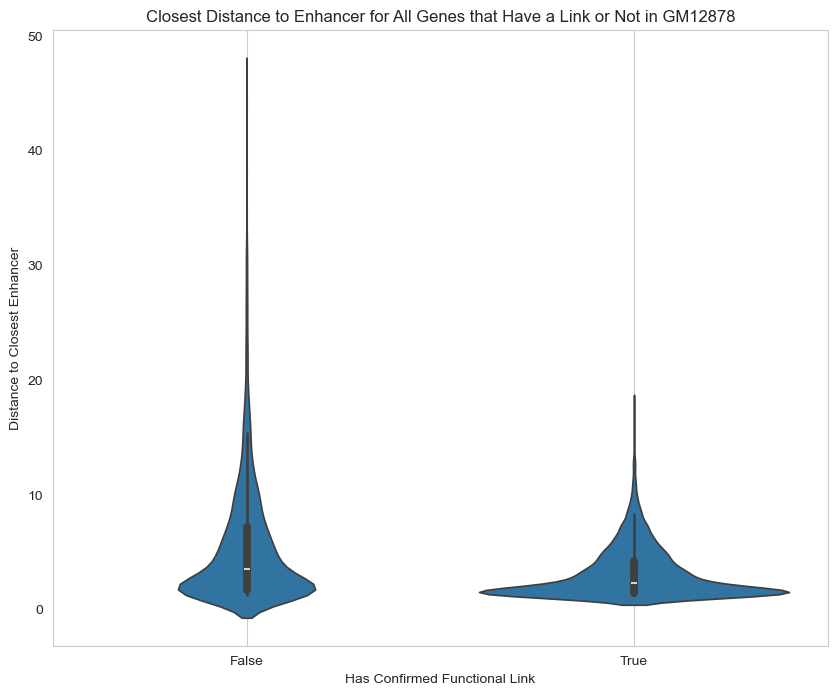

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
ax = sns.violinplot(data=gm12878_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
gm12878_has_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
gm12878_no_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(gm12878_has_link, gm12878_no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")
# annotations = [(False, True, p)]  # Compare False vs True
# starbars.draw_annotation(
#     annotations=annotations,
#     ax=ax
# )

plt.xlabel("Has Confirmed Functional Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("Closest Distance to Enhancer for All Genes that Have a Link or Not in GM12878")
plt.grid()
plt.savefig("figs/exp1_gm.png", dpi=300, bbox_inches='tight')
plt.show()

U-statistic: 4177237.0, p-value: 5.958920527348631e-70


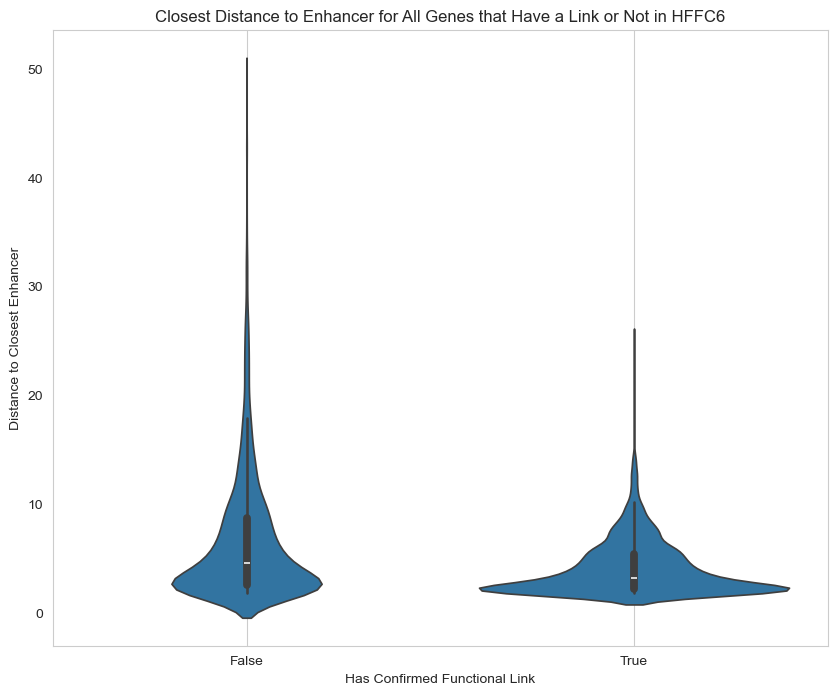

In [48]:
 # Box plot of the distance to the closest enhancer for all genes that have a link or not in HFFC6
plt.figure(figsize=(10, 8))
sns.violinplot(data=hffc6_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
hffc6_has_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
hffc6_no_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(hffc6_has_link, hffc6_no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Confirmed Functional Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("Closest Distance to Enhancer for All Genes that Have a Link or Not in HFFC6")
plt.grid()
plt.savefig("figs/exp1_hffc.png", dpi=300, bbox_inches='tight')
plt.show()

U-statistic: 4242714.5, p-value: 7.647268828138577e-86


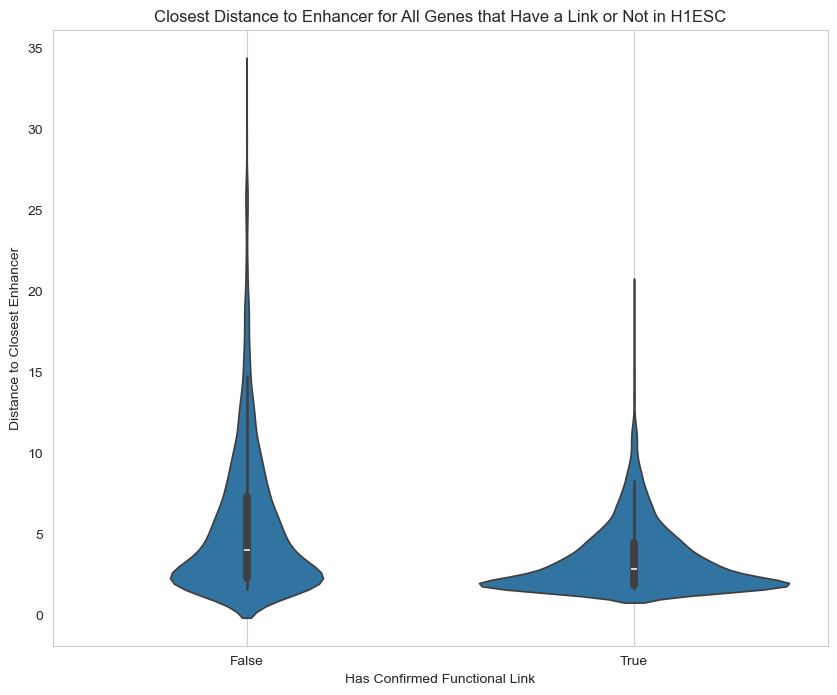

In [49]:
# Box plot of the distance to the closest enhancer for all genes that have a link or not in H1ESC
plt.figure(figsize=(10, 8))
sns.violinplot(data=h1esc_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
h1esc_has_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
h1esc_no_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(h1esc_has_link, h1esc_no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Confirmed Functional Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("Closest Distance to Enhancer for All Genes that Have a Link or Not in H1ESC")
plt.grid()
plt.savefig("figs/exp1_h1.png", dpi=300, bbox_inches='tight')
plt.show()

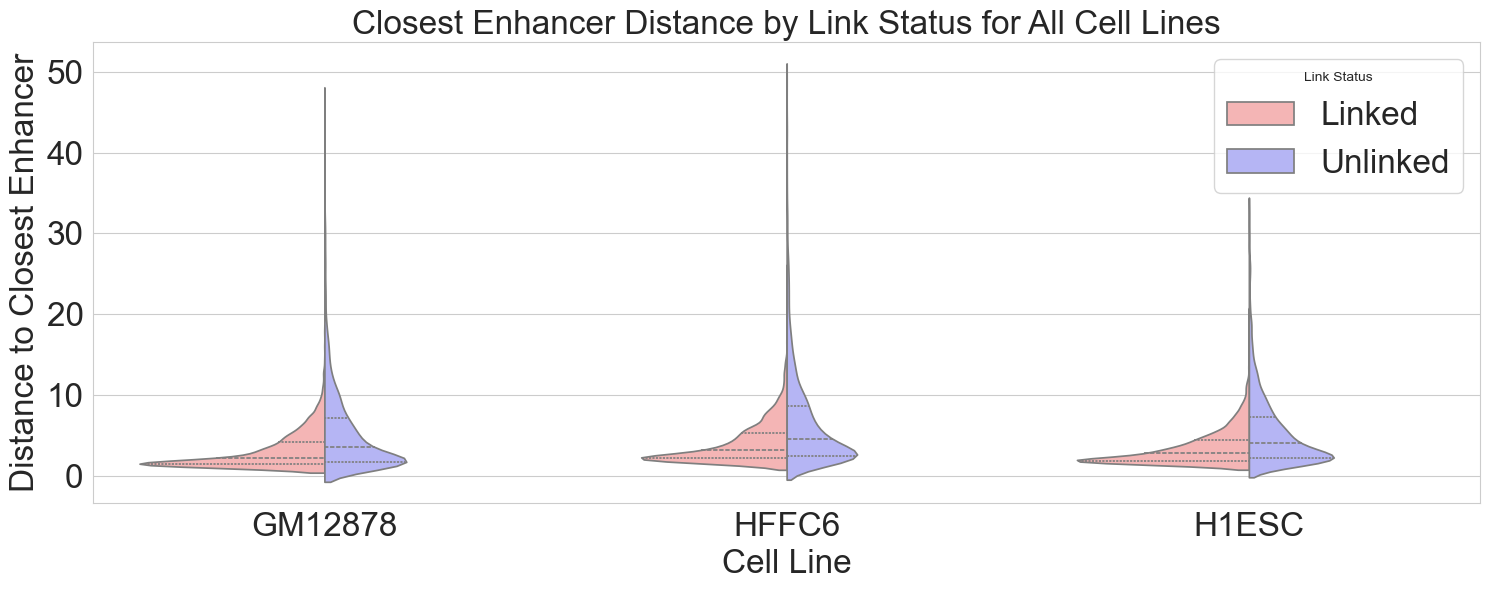

In [50]:
# Prepare data for all cell lines in a single DataFrame
gm12878 = gm12878_gene_to_closest_avg_enhancer_all.copy()
gm12878['cell_line'] = 'GM12878'
hffc6 = hffc6_gene_to_closest_avg_enhancer_all.copy()
hffc6['cell_line'] = 'HFFC6'
h1esc = h1esc_gene_to_closest_avg_enhancer_all.copy()
h1esc['cell_line'] = 'H1ESC'

all_data = pd.concat([gm12878, hffc6, h1esc])
all_data['link_status'] = all_data['has_link'].map({True: 'Linked', False: 'Unlinked'})

p1 = mannwhitneyu(
    gm12878[gm12878['has_link'] == True]['min_dist'],
    gm12878[gm12878['has_link'] == False]['min_dist'],
    alternative='two-sided'
).pvalue

p2 = mannwhitneyu(
    hffc6[hffc6['has_link'] == True]['min_dist'],
    hffc6[hffc6['has_link'] == False]['min_dist'],
    alternative='two-sided'
).pvalue

p3 = mannwhitneyu(
    h1esc[h1esc['has_link'] == True]['min_dist'],
    h1esc[h1esc['has_link'] == False]['min_dist'],
    alternative='two-sided'
).pvalue
annotations = [
    ('Unlinked', 'Linked', p1),
    ('Unlinked', 'Linked', p2),
    ('Unlinked', 'Linked', p3),
]

plt.figure(figsize=(15, 6))
ax = sns.violinplot(
    data=all_data,
    x='cell_line',
    y='min_dist',
    hue='link_status',
    split=True,
    inner='quartile',
    order=['GM12878', 'HFFC6', 'H1ESC'],
    hue_order=['Linked', 'Unlinked'],
    palette={'Linked': '#FFAAAA', 'Unlinked': '#AAAAFF'},
    common_norm=True
)
plt.xlabel('Cell Line', fontsize=24)
plt.ylabel('Distance to Closest Enhancer', fontsize=24)
plt.title('Closest Enhancer Distance by Link Status for All Cell Lines', fontsize=24)
plt.legend(title='Link Status', loc='upper right', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# starbars.draw_annotation(annotations=annotations, ax=ax)

plt.tight_layout()
plt.savefig("figs/exp1_all_cell_lines.png", dpi=300, bbox_inches='tight')
plt.show()

U-statistic: 4568486.0, p-value: 1.410005516727075e-80
2.0 0.03


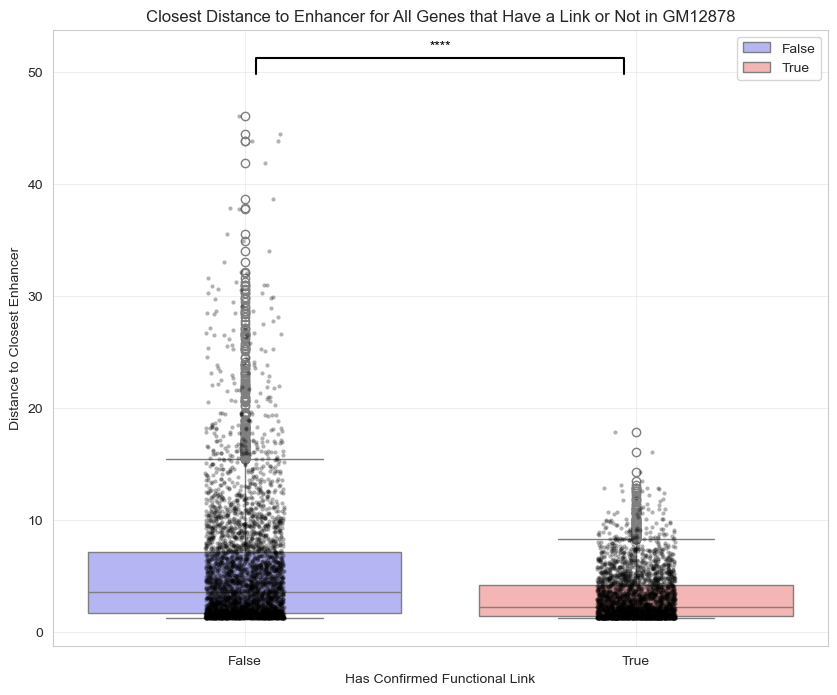

U-statistic: 4177237.0, p-value: 5.958920527348631e-70
2.0 0.03


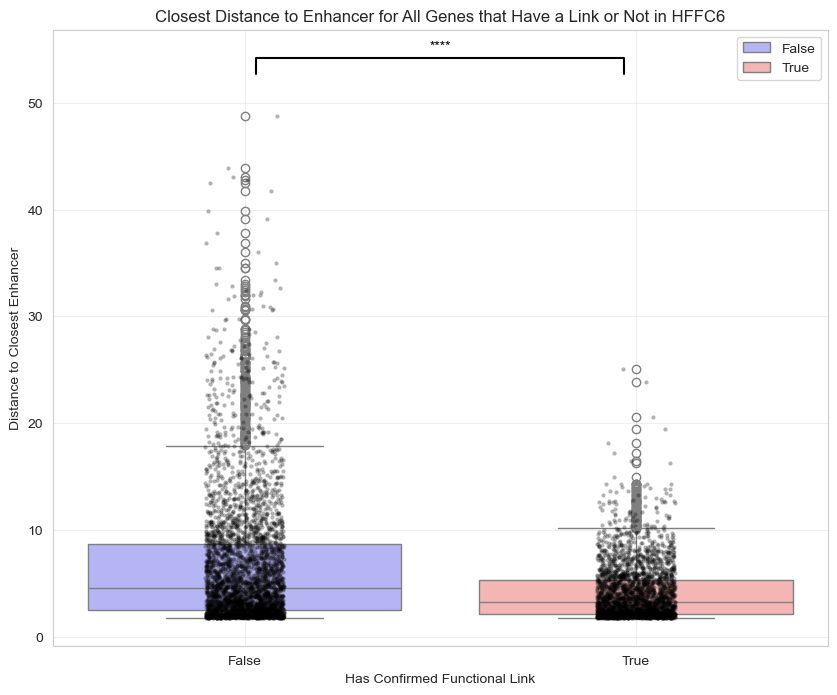

U-statistic: 4242714.5, p-value: 7.647268828138577e-86
2.0 0.03


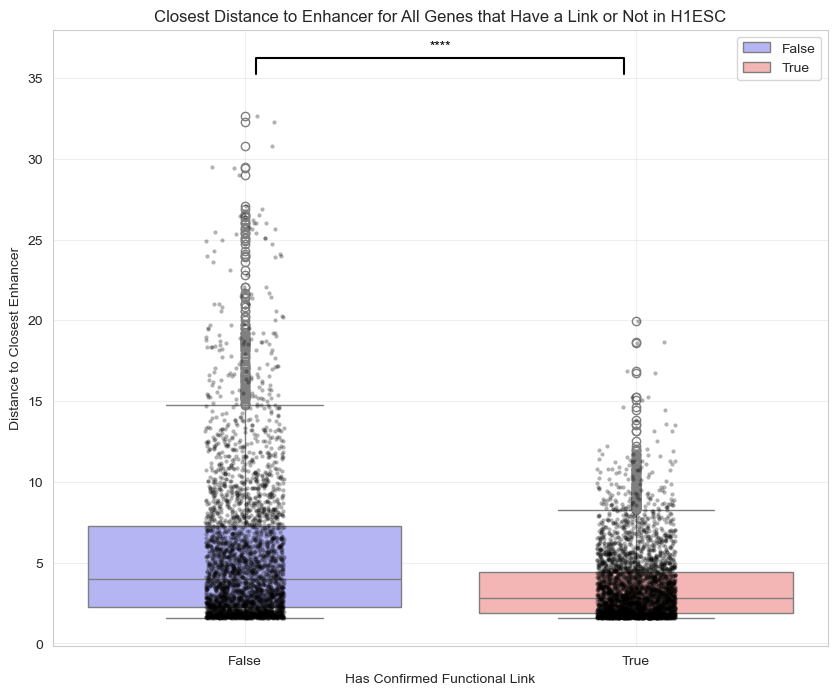

In [51]:

def plot_with_starbars(df, column, title, palette=None, plot_path=None):
    """
    Creates a boxplot with significance stars using starbars package.

    Args:
        df: DataFrame with 'has_link' column
        column: Column to plot (e.g. 'min_dist')
        title: Plot title
        palette: Optional color palette for the plot
    """
    plt.figure(figsize=(10, 8))

    # Create boxplot
    ax = sns.boxplot(
        data=df,
        x='has_link',
        y=column,
        palette=palette or ['#AAAAFF', '#FFAAAA'],
        hue='has_link'
    )

    # Add individual data points
    sns.stripplot(
        data=df,
        x='has_link',
        y=column,
        color='black',
        size=3,
        alpha=0.3,
        jitter=True
    )

    # Perform Mann-Whitney U test
    has_link = df[df["has_link"] == True][column]
    no_link = df[df["has_link"] == False][column]
    stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
    print(f"U-statistic: {stat}, p-value: {p}")

    # Add significance stars using starbars
    annotations = [(False, True, p)]  # Compare False vs True
    starbars.draw_annotation(
        annotations=annotations,
        ax=ax
    )

    plt.title(title)
    plt.xlabel("Has Confirmed Functional Link")
    plt.ylabel("Distance to Closest Enhancer")
    plt.grid(alpha=0.3)
    if plot_path:
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')

    return plt

# Example usage for each cell line
plot_with_starbars(
    gm12878_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "Closest Distance to Enhancer for All Genes that Have a Link or Not in GM12878",
    plot_path="figs/exp1_gm_star.png"
).show()

plot_with_starbars(
    hffc6_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "Closest Distance to Enhancer for All Genes that Have a Link or Not in HFFC6",
    plot_path="figs/exp1_hffc_star.png"
).show()

plot_with_starbars(
    h1esc_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "Closest Distance to Enhancer for All Genes that Have a Link or Not in H1ESC",
    plot_path="figs/exp1_h1_star.png"
).show()

In [52]:
gm12878_neanderthal_all_pairs_with_has_link = gm12878_neanderthal_df_ref.copy()
gm12878_neanderthal_all_pairs_with_has_link['has_link'] = (
    gm12878_neanderthal_all_pairs_with_has_link['gene_id'].isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & gm12878_neanderthal_all_pairs_with_has_link['enh_id'].isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

hffc6_neanderthal_all_pairs_with_has_link = hffc6_neanderthal_df_ref.copy()
hffc6_neanderthal_all_pairs_with_has_link['has_link'] = (
    hffc6_neanderthal_all_pairs_with_has_link['gene_id'].isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & hffc6_neanderthal_all_pairs_with_has_link['enh_id'].isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

h1esc_neanderthal_all_pairs_with_has_link = h1esc_neanderthal_df_ref.copy()
h1esc_neanderthal_all_pairs_with_has_link['has_link'] = (
    h1esc_neanderthal_all_pairs_with_has_link['gene_id'].isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & h1esc_neanderthal_all_pairs_with_has_link['enh_id'].isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

In [53]:
all_pairs_joined_hffc6_h1esc = (
    gm12878_neanderthal_all_pairs_with_has_link
    .merge(
        hffc6_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_gm12878", "_hffc6"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, gm12878_avg_dist, hffc6_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (gm12878, hffc6)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_gm12878_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_hffc6_yes_link_gm12878_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/2772785186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


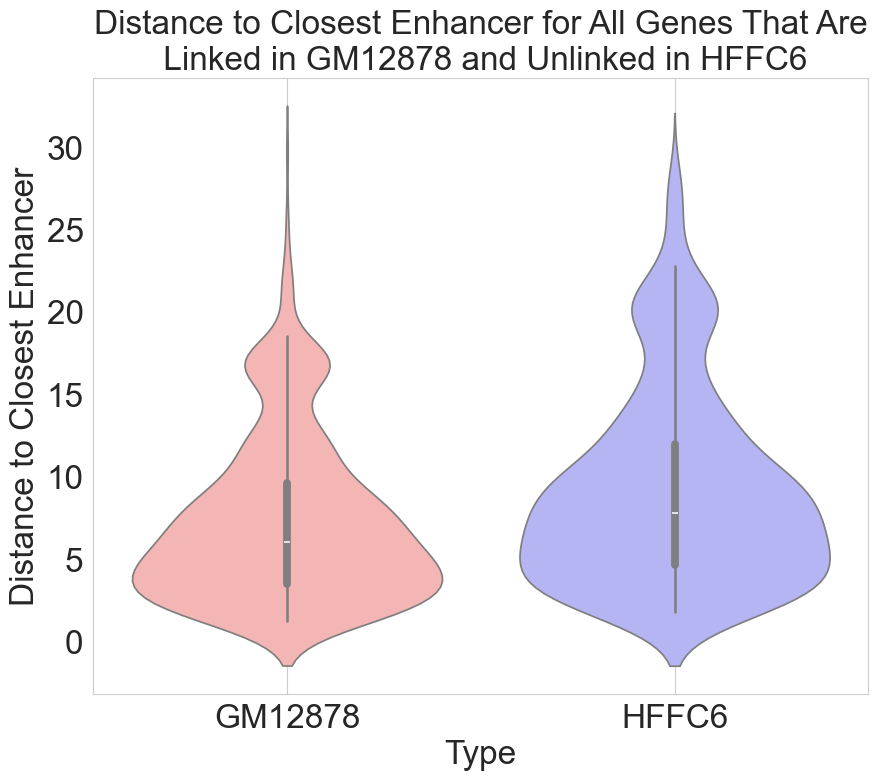

In [54]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
all_pairs_by_type_gm12878_yes_link_hffc6_no_link['type'] = all_pairs_by_type_gm12878_yes_link_hffc6_no_link['type'].str.upper()

plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_gm12878_yes_link_hffc6_no_link,
    palette={"GM12878": "#FFAAAA", "HFFC6": "#AAAAFF"}
)

plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)

plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in GM12878 and Unlinked in HFFC6", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_gm_to_hffc_fwd_violin.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/714150416.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


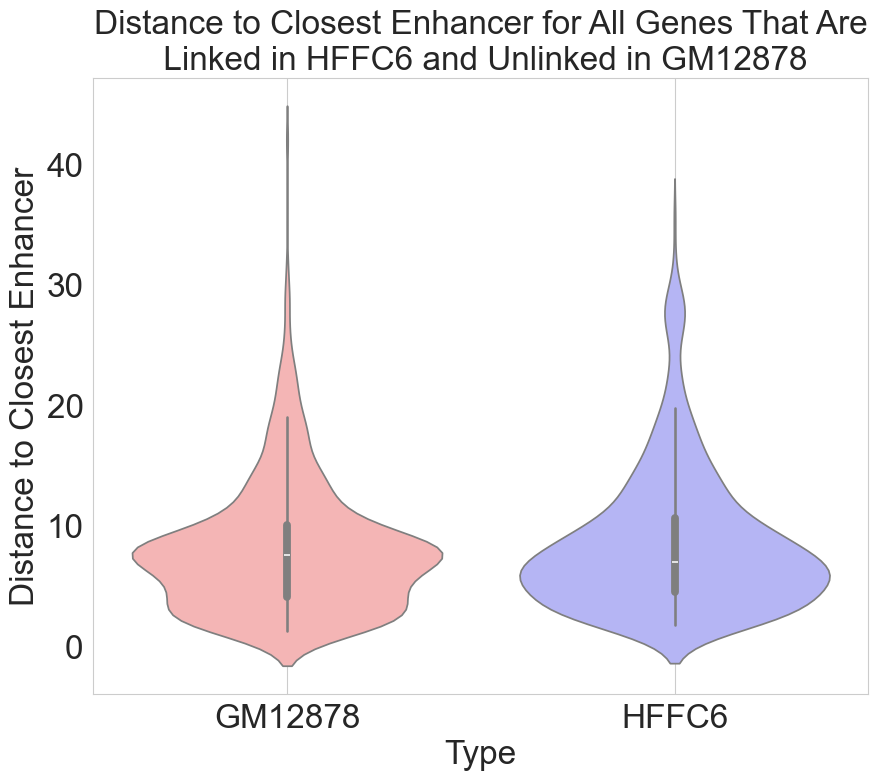

In [55]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
all_pairs_by_type_hffc6_yes_link_gm12878_no_link['type'] = all_pairs_by_type_hffc6_yes_link_gm12878_no_link['type'].str.upper()

plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_gm12878_no_link,
    palette={"GM12878": "#FFAAAA", "HFFC6": "#AAAAFF"}
)
plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)

plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in HFFC6 and Unlinked in GM12878", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_gm_to_hffc_bck_violin.png", dpi=300, bbox_inches='tight')
plt.show()

In [56]:
all_pairs_joined_hffc6_h1esc = (
    hffc6_neanderthal_all_pairs_with_has_link
    .merge(
        h1esc_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_hffc6", "_h1esc"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, hffc6_avg_dist, h1esc_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (hffc6, h1esc)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_hffc6_yes_link_h1esc_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_h1esc_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/124910878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


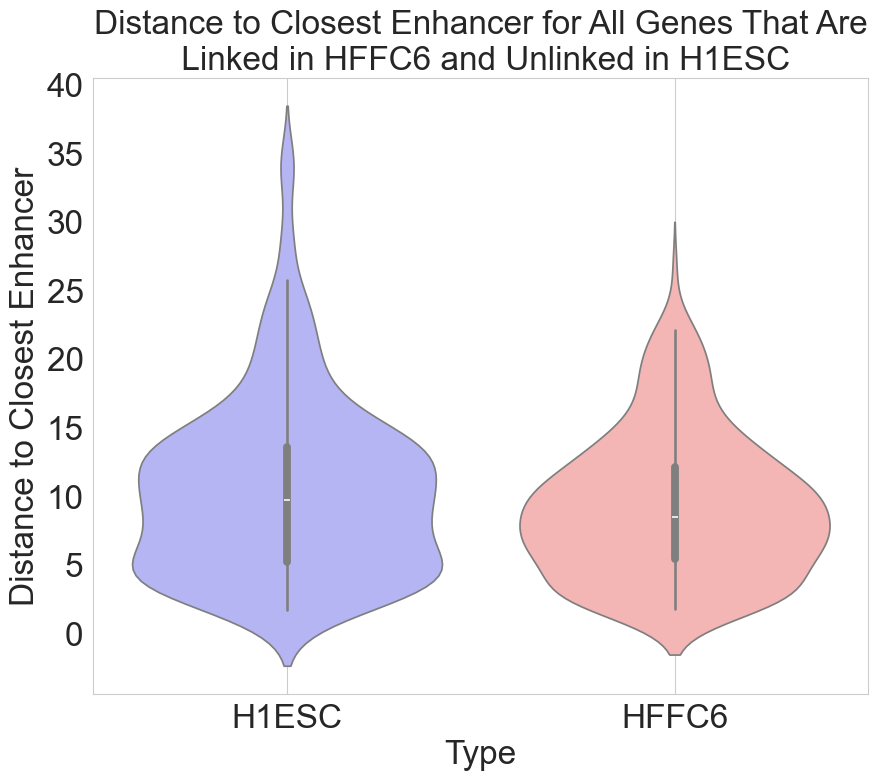

In [57]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
all_pairs_by_type_hffc6_yes_link_h1esc_no_link['type'] = all_pairs_by_type_hffc6_yes_link_h1esc_no_link['type'].str.upper()

plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_h1esc_no_link,
    palette={"HFFC6": "#FFAAAA", "H1ESC": "#AAAAFF"}
)
plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)

plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in HFFC6 and Unlinked in H1ESC", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_hffc_to_h1_fwd_violin.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/2675463708.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


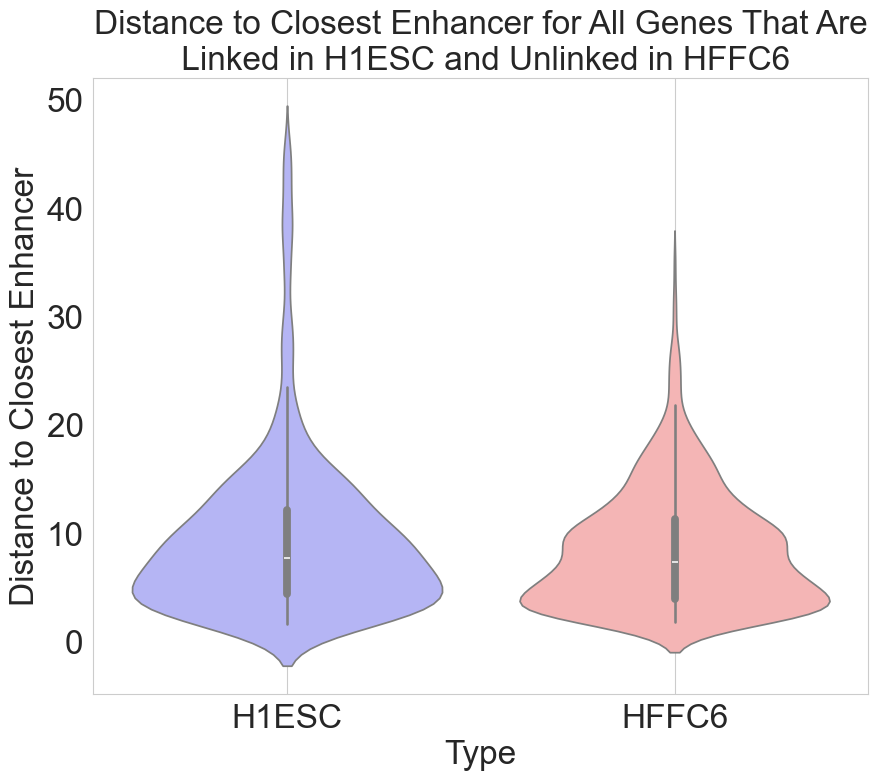

In [58]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
all_pairs_by_type_h1esc_yes_link_hffc6_no_link['type'] = all_pairs_by_type_h1esc_yes_link_hffc6_no_link['type'].str.upper()

plt.figure(figsize=(10, 8))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_h1esc_yes_link_hffc6_no_link,
    palette={"HFFC6": "#FFAAAA", "H1ESC": "#AAAAFF"}
)
plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)

plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in H1ESC and Unlinked in HFFC6", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_hffc_to_h1_bck_violin.png", dpi=300, bbox_inches='tight')
plt.show()

In [59]:
all_pairs_joined_gm12878_h1esc = (
    gm12878_neanderthal_all_pairs_with_has_link
    .merge(
        h1esc_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_gm12878", "_h1esc"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, gm12878_avg_dist, h1esc_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (gm12878, h1esc)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_gm12878_yes_link_h1esc_no_link = (
    all_pairs_joined_gm12878_h1esc
    [
        (all_pairs_joined_gm12878_h1esc["has_link_gm12878"] == True) &
        (all_pairs_joined_gm12878_h1esc["has_link_h1esc"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_h1esc_yes_link_gm12878_no_link = (
    all_pairs_joined_gm12878_h1esc[
        (all_pairs_joined_gm12878_h1esc["has_link_h1esc"] == True) &
        (all_pairs_joined_gm12878_h1esc["has_link_gm12878"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/634155747.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


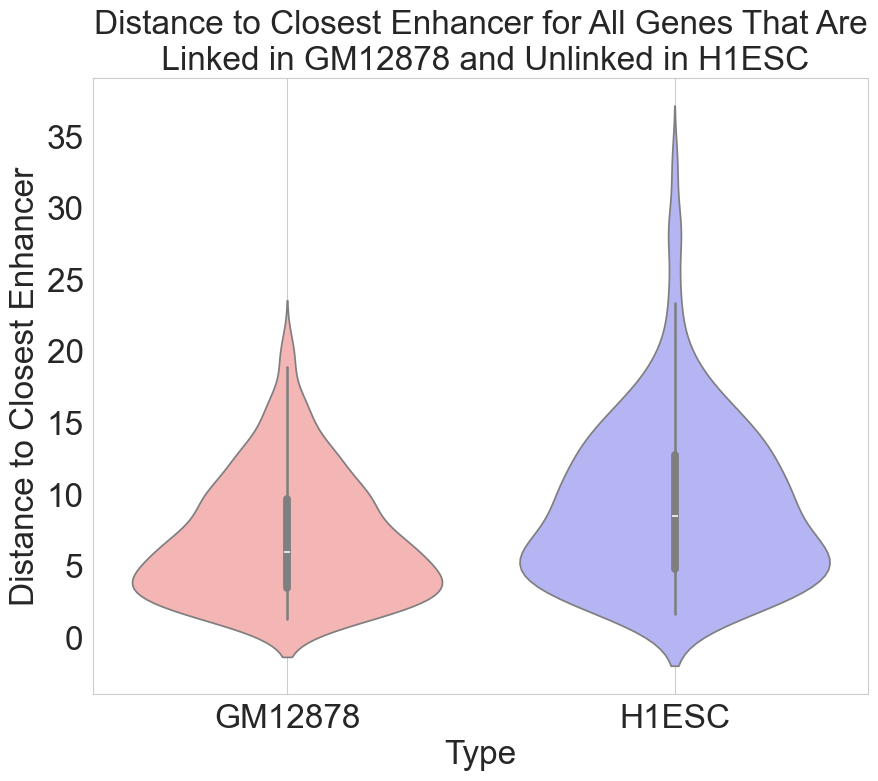

In [60]:
plt.figure(figsize=(10, 8))
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
all_pairs_by_type_gm12878_yes_link_h1esc_no_link['type'] = all_pairs_by_type_gm12878_yes_link_h1esc_no_link['type'].str.upper()

sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_gm12878_yes_link_h1esc_no_link,
    palette={"GM12878": "#FFAAAA", "H1ESC": "#AAAAFF"}
)

plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)
plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in GM12878 and Unlinked in H1ESC", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_gm_to_h1_fwd_violin.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/859424125.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


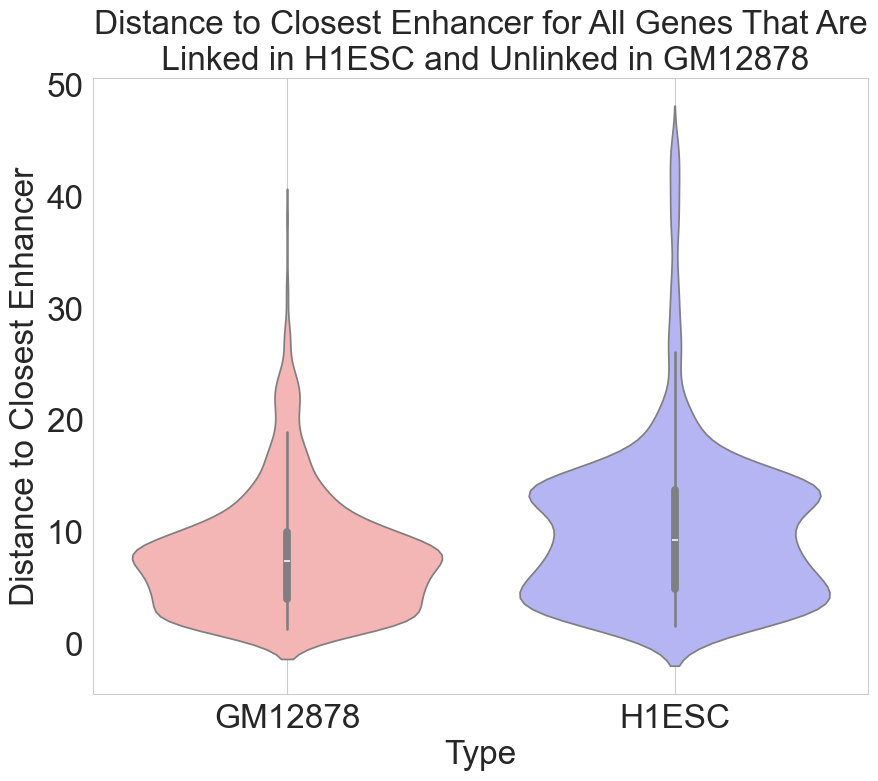

In [61]:
plt.figure(figsize=(10, 8))
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
all_pairs_by_type_h1esc_yes_link_gm12878_no_link['type'] = all_pairs_by_type_h1esc_yes_link_gm12878_no_link['type'].str.upper()

sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_h1esc_yes_link_gm12878_no_link,
    palette={"GM12878": "#FFAAAA", "H1ESC": "#AAAAFF"}
)

plt.xlabel("Type", fontsize=24)
plt.ylabel("Distance to Closest Enhancer", fontsize=24)
plt.title("Distance to Closest Enhancer for All Genes That Are\n Linked in H1ESC and Unlinked in GM12878", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.grid()
plt.savefig("figs/exp2_gm_to_h1_bck_violin.png", dpi=300, bbox_inches='tight')
plt.show()

In [62]:
# 1. Add quartile-based category columns for each cell line
for df, name in [
    (gm12878_gene_to_closest_avg_enhancer_all, 'gm12878'),
    (hffc6_gene_to_closest_avg_enhancer_all, 'hffc6'),
    (h1esc_gene_to_closest_avg_enhancer_all, 'h1esc'),
]:
    q1 = df['min_dist'].quantile(0.33)
    q3 = df['min_dist'].quantile(0.66)
    def label_quartile(x):
        if x <= q1:
            return 'small'
        elif x <= q3:
            return 'mid'
        else:
            return 'large'
    df['quartile_cat'] = df['min_dist'].apply(label_quartile)

In [63]:
def plot_quartile_jumps_heatmap(jumps, title, y_label, x_label, plot_path=None):
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.patches import Patch

    quartiles = ['small', 'mid', 'large']
    matrix = np.zeros((3, 3), dtype=int)

    # Fill the matrix with counts
    for i, src in enumerate(quartiles):
        for j, dst in enumerate(quartiles):
            matrix[i, j] = jumps.get((src, dst), 0)

    plt.figure(figsize=(6, 6))

    # Create base heatmap without annotations
    ax = sns.heatmap(
        matrix,
        annot=False,
        fmt='d',
        cmap=sns.color_palette(['#b3cde3']),
        xticklabels=quartiles,
        yticklabels=quartiles,
        cbar=False
    )

    # Colors for different transition types
    dark_red = 'darkred'      # small -> large (most dramatic increase)
    medium_red = '#FF5050'    # mid -> large (moderate increase)
    dark_green = 'darkgreen'  # large -> small (most dramatic decrease)
    medium_green = '#50A050'  # large -> mid (moderate decrease)

    if matrix[0, 2] > 0:
        ax.add_patch(plt.Rectangle((2, 0), 1, 1, fill=True, color=dark_red, alpha=0.7))
        ax.text(2.5, 0.5, str(matrix[0, 2]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=24)
    if matrix[2, 0] > 0:
        ax.add_patch(plt.Rectangle((0, 2), 1, 1, fill=True, color=dark_green, alpha=0.7))
        ax.text(0.5, 2.5, str(matrix[2, 0]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=24)
    if matrix[1, 2] > 0:
        ax.add_patch(plt.Rectangle((2, 1), 1, 1, fill=True, color=medium_red, alpha=0.7))
        ax.text(2.5, 1.5, str(matrix[1, 2]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=24)
    if matrix[2, 1] > 0:
        ax.add_patch(plt.Rectangle((1, 2), 1, 1, fill=True, color=medium_green, alpha=0.7))
        ax.text(1.5, 2.5, str(matrix[2, 1]), ha="center", va="center",
                color="white", fontweight='bold', fontsize=24)

    # Add annotations for the remaining cells
    for i in range(3):
        for j in range(3):
            # Skip cells we've already handled
            if (i == 0 and j == 2) or (i == 2 and j == 0) or \
               (i == 1 and j == 2) or (i == 2 and j == 1):
                continue
            ax.text(
                j + 0.5,
                i + 0.5,
                str(matrix[i, j]),
                ha="center",
                va="center",
                color="black",
                fontsize=24
            )

    plt.xlabel(x_label, fontsize=24)
    plt.ylabel(y_label, fontsize=24)
    plt.title(title, fontsize=24)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)

    # Add legend with all transition types
    legend_elements = [
        Patch(facecolor=dark_red, alpha=0.7, label='Small → Large'),
        Patch(facecolor=medium_red, alpha=0.7, label='Mid → Large'),
        Patch(facecolor=dark_green, alpha=0.7, label='Large → Small'),
        Patch(facecolor=medium_green, alpha=0.7, label='Large → Mid'),
        Patch(facecolor='#b3cde3', label='Other transitions')
    ]
    plt.legend(handles=legend_elements, loc='upper center',
               bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=16)

    if plot_path:
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    else:
        plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/matplotlib/pyplot.py'>

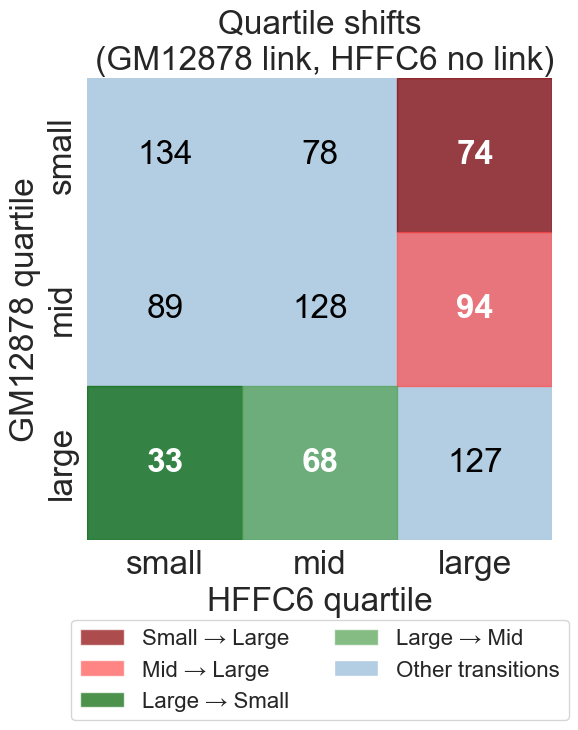

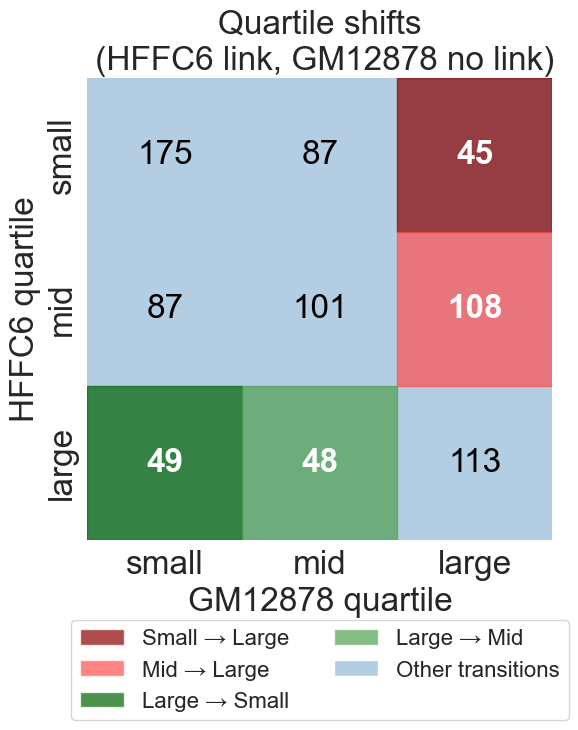

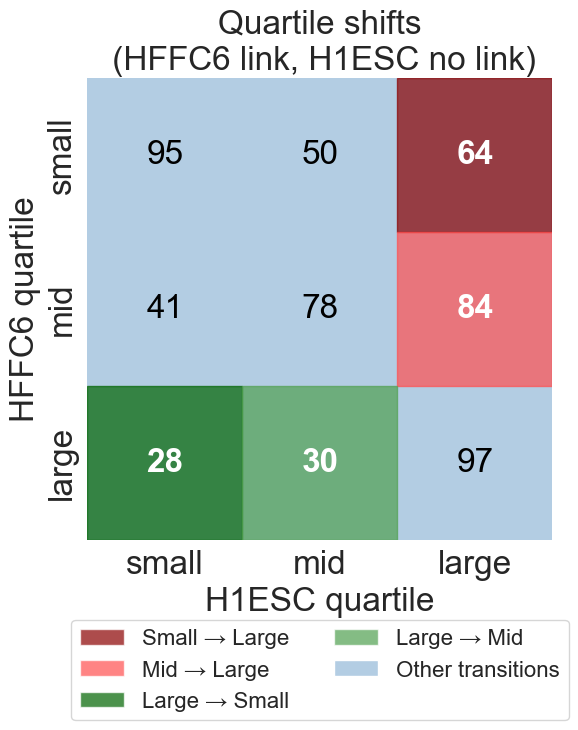

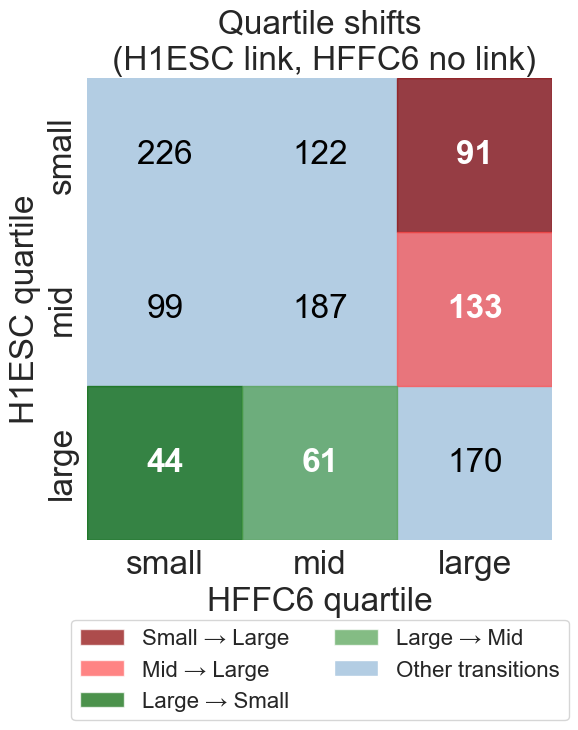

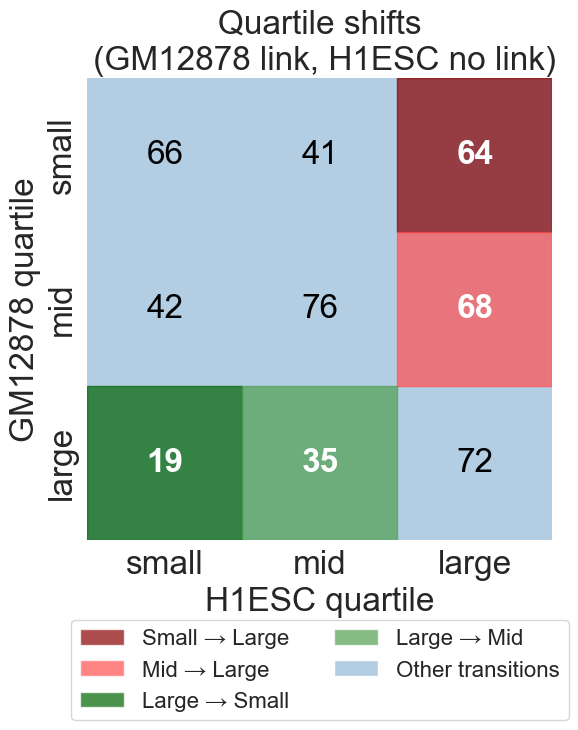

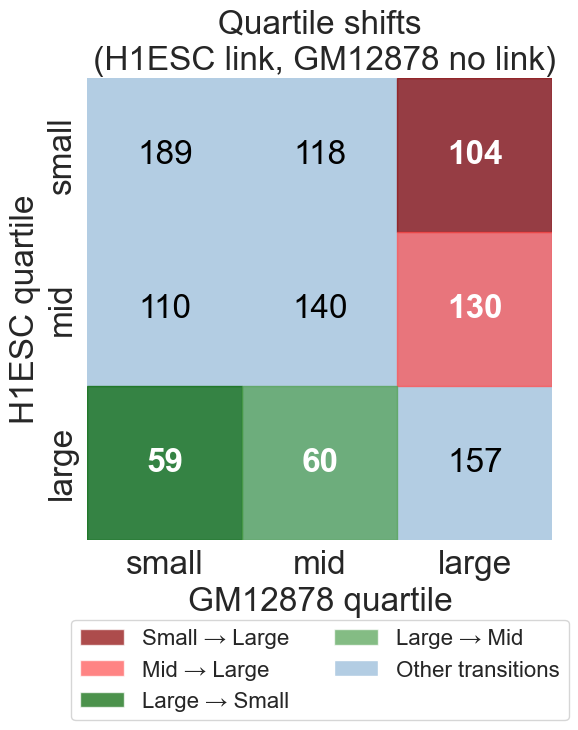

In [64]:
# 2. Compare quartile jumps for genes with link in one cell line but not the other
# Example: GM12878 vs HFFC6
merged_gm12878_hffc6 = gm12878_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    hffc6_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_gm12878', '_hffc6')
)
# Genes with link in GM12878 but not in HFFC6
jump_gm12878_link = merged_gm12878_hffc6[(merged_gm12878_hffc6['has_link_gm12878']) & (~merged_gm12878_hffc6['has_link_hffc6'])]
# Genes with link in HFFC6 but not in GM12878
jump_hffc6_link = merged_gm12878_hffc6[(merged_gm12878_hffc6['has_link_hffc6']) & (~merged_gm12878_hffc6['has_link_gm12878'])]

# Count quartile jumps
from collections import Counter
jumps_hffc6_no_link_to_gm12878_link = Counter(zip(jump_gm12878_link['quartile_cat_gm12878'], jump_gm12878_link['quartile_cat_hffc6']))
jumps_gm12878_no_link_to_hffc6_link = Counter(zip(jump_hffc6_link['quartile_cat_hffc6'], jump_hffc6_link['quartile_cat_gm12878']))


plot_quartile_jumps_heatmap(jumps_hffc6_no_link_to_gm12878_link, 'Quartile shifts\n (GM12878 link, HFFC6 no link)', 'GM12878 quartile', 'HFFC6 quartile', 'figs/exp2_gm_to_hffc_fwd_qjumps.png')
plot_quartile_jumps_heatmap(jumps_gm12878_no_link_to_hffc6_link, 'Quartile shifts\n (HFFC6 link, GM12878 no link)', 'HFFC6 quartile', 'GM12878 quartile', 'figs/exp2_gm_to_hffc_bck_qjumps.png')

# HFFC6 <-> H1ESC
merged_hffc6_h1esc = hffc6_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    h1esc_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_hffc6', '_h1esc')
)
jump_hffc6_link_h1esc = merged_hffc6_h1esc[(merged_hffc6_h1esc['has_link_hffc6']) & (~merged_hffc6_h1esc['has_link_h1esc'])]
jump_h1esc_link_hffc6 = merged_hffc6_h1esc[(merged_hffc6_h1esc['has_link_h1esc']) & (~merged_hffc6_h1esc['has_link_hffc6'])]
from collections import Counter
jumps_hffc6_h1esc = Counter(zip(jump_hffc6_link_h1esc['quartile_cat_hffc6'], jump_hffc6_link_h1esc['quartile_cat_h1esc']))
jumps_h1esc_hffc6 = Counter(zip(jump_h1esc_link_hffc6['quartile_cat_h1esc'], jump_h1esc_link_hffc6['quartile_cat_hffc6']))

plot_quartile_jumps_heatmap(jumps_hffc6_h1esc, 'Quartile shifts\n (HFFC6 link, H1ESC no link)', 'HFFC6 quartile', 'H1ESC quartile', 'figs/exp2_hffc_to_h1_fwd_qjumps.png')
plot_quartile_jumps_heatmap(jumps_h1esc_hffc6, 'Quartile shifts\n (H1ESC link, HFFC6 no link)', 'H1ESC quartile', 'HFFC6 quartile', 'figs/exp2_hffc_to_h1_bck_qjumps.png')

# GM12878 <-> H1ESC
merged_gm12878_h1esc = gm12878_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    h1esc_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_gm12878', '_h1esc')
)
jump_gm12878_link_h1esc = merged_gm12878_h1esc[(merged_gm12878_h1esc['has_link_gm12878']) & (~merged_gm12878_h1esc['has_link_h1esc'])]
jump_h1esc_link_gm12878 = merged_gm12878_h1esc[(merged_gm12878_h1esc['has_link_h1esc']) & (~merged_gm12878_h1esc['has_link_gm12878'])]
jumps_gm12878_h1esc = Counter(zip(jump_gm12878_link_h1esc['quartile_cat_gm12878'], jump_gm12878_link_h1esc['quartile_cat_h1esc']))
jumps_h1esc_gm12878 = Counter(zip(jump_h1esc_link_gm12878['quartile_cat_h1esc'], jump_h1esc_link_gm12878['quartile_cat_gm12878']))

plot_quartile_jumps_heatmap(jumps_gm12878_h1esc, 'Quartile shifts\n (GM12878 link, H1ESC no link)', 'GM12878 quartile', 'H1ESC quartile', 'figs/exp2_gm_to_h1_fwd_qjumps.png')
plot_quartile_jumps_heatmap(jumps_h1esc_gm12878, 'Quartile shifts\n (H1ESC link, GM12878 no link)', 'H1ESC quartile', 'GM12878 quartile', 'figs/exp2_gm_to_h1_bck_qjumps.png')

In [156]:
from functools import reduce
from gprofiler import GProfiler

gp = GProfiler(
    user_agent='enhancer3d', #optional user agent
    return_dataframe=True, #return pandas dataframe or plain python structures
)

def cell_line_1_small_has_link_other_cell_lines_large_no_link(
    cell_lines_gene_to_closest_avg_enhancer_with_names,
    use_quantile_cats=True,
    use_has_link=True,
):
    """
    Finds genes that are small in cell line 1 and large in cell line 2, with a link in cell line 1 but not in cell line 2.
    """
    # result = (
    #     cell_line_1_gene_to_closest_avg_enhancer
    #     .merge(
    #         cell_line_2_gene_to_closest_avg_enhancer,
    #         on="gene_id"
    #     )
    #     .query(
    #         f"quartile_cat_{cell_line_1_name} == 'small' and quartile_cat_{cell_line_2_name} == 'large' and has_link_{cell_line_1_name} == True and has_link_{cell_line_2_name} == False"
    #     )
    #     .query(
    #         f"quartile_cat_{cell_line_1_name} == 'small' and quartile_cat_{cell_line_2_name} == 'large'"
    #     )
    # )
    # result = (
    #     reduce(
    #         lambda x, y: x.merge(
    #             y["data"],
    #             on="gene_id",
    #             how='inner',
    #             suffixes=("", f"_{y['cell_line']}")
    #         ),
    #         cell_lines_gene_to_closest_avg_enhancer_with_names[1:],
    #         cell_lines_gene_to_closest_avg_enhancer_with_names[0]["data"].copy()
    #     )
    # )

    primary_cell_line = next(
        (cell_line for cell_line in cell_lines_gene_to_closest_avg_enhancer_with_names if cell_line['quartile_cat'] == 'small' and cell_line['has_link']),
        None
    )

    non_primary_cell_lines = [
        cell_line for cell_line in cell_lines_gene_to_closest_avg_enhancer_with_names
        if cell_line['quartile_cat'] == 'large' and not cell_line['has_link']
    ]

    results = []
    for cell_line in non_primary_cell_lines:
        query_terms = []
        if use_quantile_cats:
            query_terms.append(
                f"quartile_cat == 'small' and quartile_cat_{cell_line['cell_line']} == 'large'"
            )

        if use_has_link:
            query_terms.append(
                f"has_link == True and has_link_{cell_line['cell_line']} == False"
            )

        query_str = " and ".join(query_terms)

        result = (
            primary_cell_line['data']
            .merge(
                cell_line['data'],
                on="gene_id",
                how='inner',
                suffixes=("", f"_{cell_line['cell_line']}")
            )
            .query(query_str)
        )
        results.append(result)


    # query_terms = []
    # for cell_line in cell_lines_gene_to_closest_avg_enhancer_with_names:
    #     if use_quantile_cats:
    #         query_terms.append(
    #             f"quartile_cat{'_' + cell_line['cell_line'] if cell_line['cell_line'] else ''} == '{cell_line['quartile_cat']}'"
    #         )
    #     if use_has_link:
    #         query_terms.append(
    #             f"has_link{'_' + cell_line['cell_line'] if cell_line['cell_line'] else ''} == {cell_line['has_link']}"
    #         )

    # query_str = " and ".join(query_terms)
    # result = result.query(query_str)

    genes = list(set(reduce(
        lambda x, y: x + y.index.tolist(),
        results,
        []
    )))

    gene_names = (
        gp
        .convert(
            organism='hsapiens',
            query=genes
        )
        [['converted', 'name']]
        .set_index('converted', drop=True)
    )

    return gene_names['name'].tolist()

In [138]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import gseapy

def get_enrichment_results(gene_list, gene_sets):
    """
    Get enrichment results for a given gene list using gseapy.
    """
    enr = gseapy.enrichr(
        gene_list=gene_list,
        gene_sets=gene_sets,
        organism='Human',
        outdir=None,
        cutoff=0.05  # Adjust the cutoff as needed
    )

    results = enr.results[['Term', 'P-value', 'Adjusted P-value', 'Overlap', 'Combined Score', 'Genes']]
    results = results.sort_values(by='Adjusted P-value').head(10)
    results['Genes Ratio'] = results['Genes'].apply(lambda x: len(x.split(';')) / len(gene_list))
    return results.reset_index(drop=True)

def dotplot(
    results,
    figsize=(10, 8),
    fontsize=12,
    title="Enrichment Results",
    xlabel="Adjusted P-value",
    ylabel="Term",
    plot_path=None,
    palette=sns.mpl_palette("viridis", as_cmap=True)
):
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(
        data=results,
        x='Genes Ratio',
        y='Term',
        size='Combined Score',
        sizes=(20, 200),
        hue='Adjusted P-value',
        palette=palette,
        ax=ax,
        legend=False,
    )


    norm = Normalize(vmin=results['Adjusted P-value'].min(), vmax=results['Adjusted P-value'].max())
    sm = ScalarMappable(cmap=palette, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, label='Adjusted P-value', shrink=0.8)
    cbar.ax.tick_params(labelsize=fontsize-2)
    cbar.set_label('Adjusted P-value', fontsize=fontsize)

    handles, labels = ax.get_legend_handles_labels()
    size_legend = ax.legend(
        handles=handles[:len(handles)//2],
        labels=labels[:len(labels)//2],
        title='Combined Score',
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=fontsize-2,
        title_fontsize=fontsize
    )


    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    plt.tight_layout()
    if plot_path:
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    return fig

GM12878 small has link, Other cell lines large no link:
GTF2H1
DENND1C
LGALS14
ANKRD12
POMC
CRIP3
NUP210
STAU2
PKN2
TUT7
TPSB2
IFI16
PRKCI
TTYH1
HPS5
CFAP61
ADGRE3
CD70
PTTG1IP
CREBL2
CD244
MMP7
GNGT2
C4BPB
DZIP3
IQCF1
GLIPR2
BRIX1
CTSS
ITGAE
STK24
DDX47
TTF1
PIK3CB
CDCA7
TNF
FAM117B
ZNF83
DNLZ
CD1C
ADGRD2
CD22
ADA2
HLA-DRA
UQCRC2
CR2
PTTG1
TMOD1
CFAP77
ZSCAN32
UBD
CASP3
EIF4A3
RYR1
TAGAP
SGF29
ACOT2
DNMT3L
ABI3
HDAC11
LEUTX
RNASE1
GRK4
EPB42
NUDT5
NOP14
PCYT1A
TSPAN12
EEFSEC
ISOC1
FAM111B
SMARCE1
FAM193A
POLI
CD14
RCOR3
GLO1
RND1
CARD11
CX3CL1
SMIM15
NDUFV2
ADPRH
ALOX5
None
TRPV3
CIP2A
TPSD1
NANS
ADAMTSL2
EED
CRBN
IGF2R
TM6SF1
LEO1
TRIM22
HLA-F
LRIF1
CERS4
LY9
OR13A1
IER3
VAV1
CCDC74A
CD55
MOV10L1
SLU7
SLC9A3
PHC3
IL19
AKAP8
PDHB
CPD
CDC123
CCR9
UBA6
IPPK
XPA
CD69


/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/2098808767.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  size_legend = ax.legend(
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/915501687.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  dotplot(get_enrichment_results(gm12878_small_genes, gene_sets='GO_Biological_Process_2025')).show()
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/2098808767.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  size_legend = ax.legend(
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/915501687.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  dotplot(get_enrichment_r

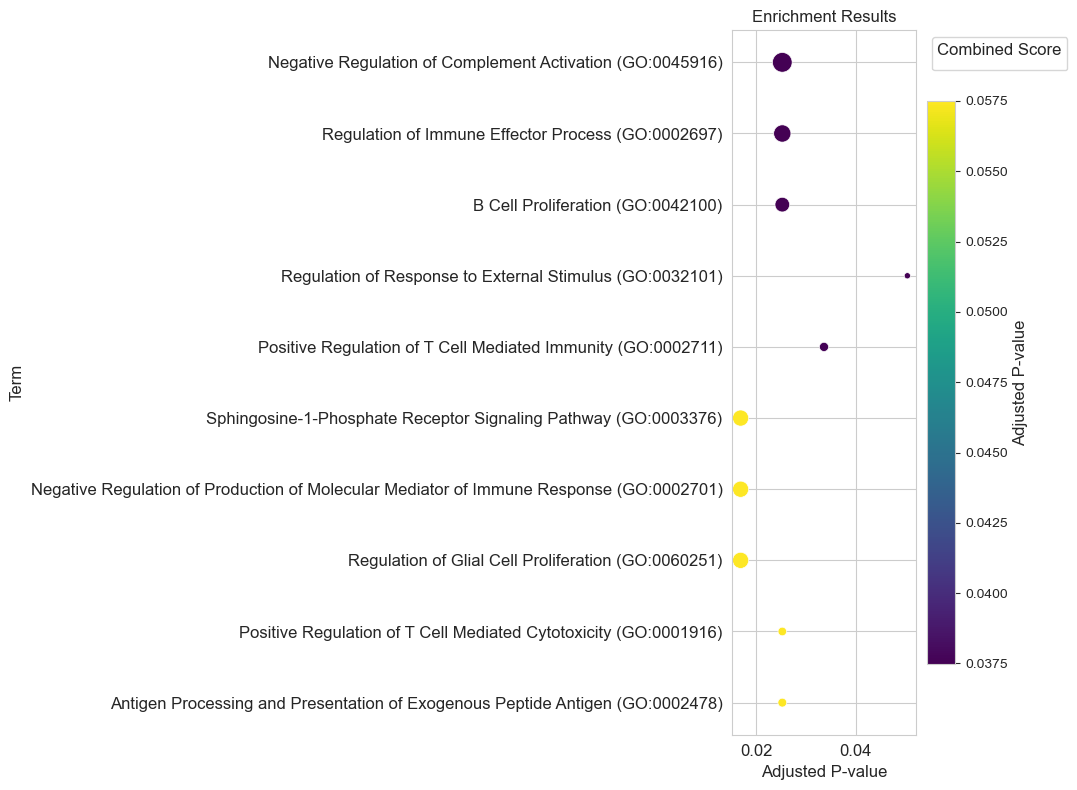

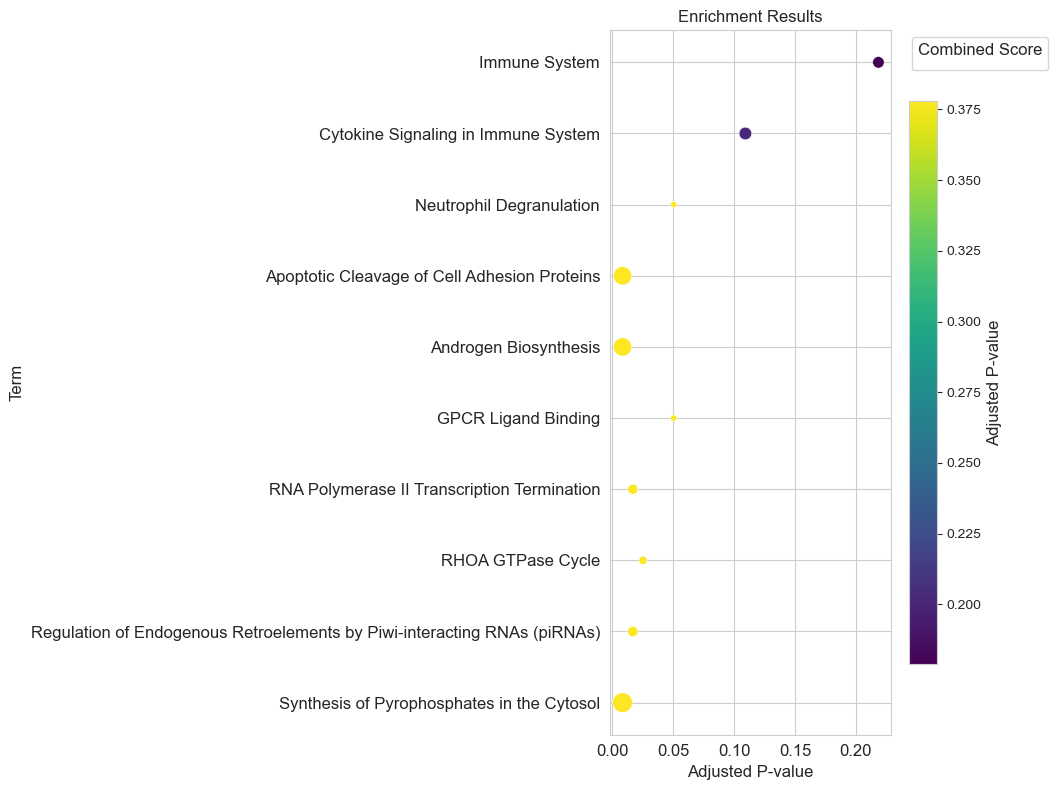

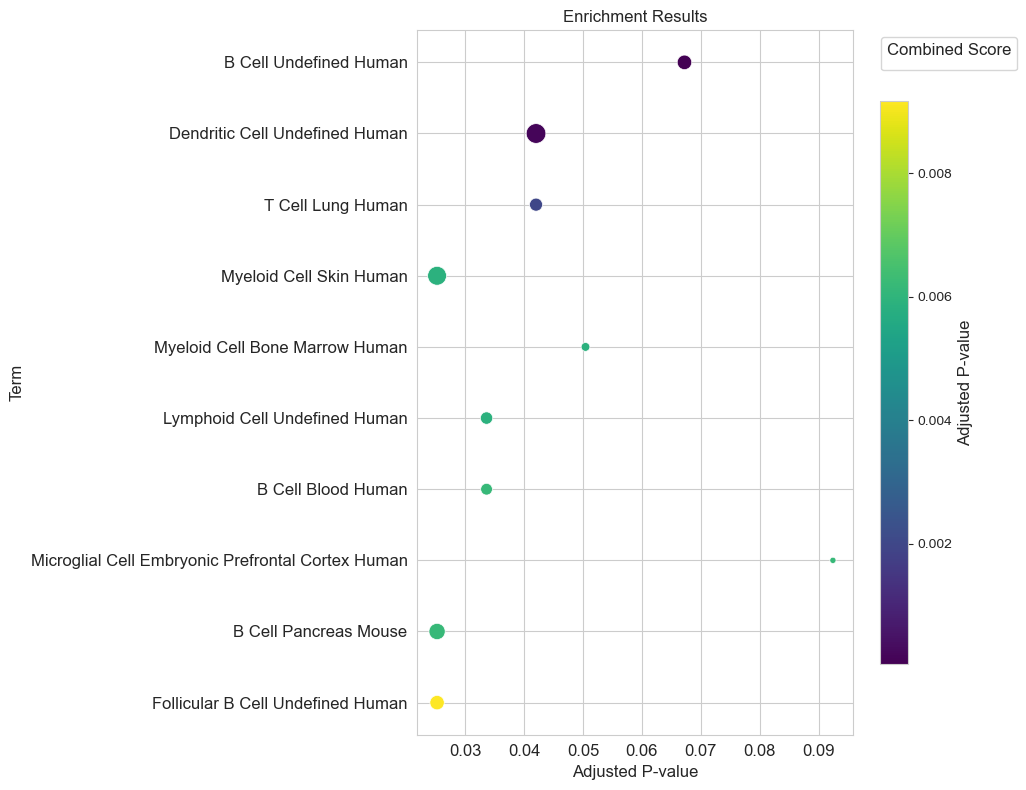

In [158]:
print("GM12878 small has link, Other cell lines large no link:")
gm12878_small_genes = cell_line_1_small_has_link_other_cell_lines_large_no_link(
    [
        {
            'data': gm12878_gene_to_closest_avg_enhancer_all,
            'quartile_cat': 'small',
            'has_link': True
        },
        {
            'cell_line': 'HFFC6',
            'data': hffc6_gene_to_closest_avg_enhancer_all,
            'quartile_cat': 'large',
            'has_link': False
        },
        {
            'cell_line': 'H1ESC',
            'data': h1esc_gene_to_closest_avg_enhancer_all,
            'quartile_cat': 'large',
            'has_link': False
        },
    ],
    use_quantile_cats=True,
    use_has_link=True
)

print("\n".join(gm12878_small_genes))
dotplot(get_enrichment_results(gm12878_small_genes, gene_sets='GO_Biological_Process_2025')).show()
dotplot(get_enrichment_results(gm12878_small_genes, gene_sets='Reactome_Pathways_2024')).show()
dotplot(get_enrichment_results(gm12878_small_genes, gene_sets='CellMarker_2024')).show()

HFFC6 small has link, Other cell lines large no link:
PHETA1
MCAT
NPIPB12
OTUD3
YAP1
ATP6V1G1
GTF2H1
ATG12
CDCP1
HNRNPA0
YBX3
RTN4
TRAM2
ARSG
TMEM86A
UBAP1
TUBE1
TWIST2
UROS
STYK1
PCDHA3
SPATA6L
COL5A1
RAP1GAP2
IFI16
FAM229B
MCM3
HPS5
ADAMTS2
CEP126
RNF44
PCDHA4
LPCAT2
MRPS2
GLIPR2
SFRP1
HIVEP3
ALDH2
CERS1
STK24
DDX47
EDRF1
PCDHA5
DNLZ
AK3
ARRDC1
DIPK1A
BCCIP
FAIM
CLTA
RPS27AP5
LIMA1
SALL2
PCDHA7
DHX9
SYT5
SORBS3
C1QTNF9
SGF29
ANGPTL5
CAPN3
INPP5E
BRCA2
GRK4
KLHL42
CHMP1B
SAXO2
NOP14
SPOCK1
OGN
PCDHA6
ASB1
GNG12
CD14
AP3S1
FYCO1
NPIPB11
DLG5
PDPR
KCNMA1
CFAP69
UPP1
SLC12A2
TGFBR3
IER3
TNC
GPRC5A
RBM15
ZNF438
GAS6
GPRC5D
ZFP91-CNTF
CFAP299
SIRPA
ARRDC4
USP15


/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/2098808767.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  size_legend = ax.legend(
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/398331151.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  dotplot(get_enrichment_results(hffc6_small_genes, gene_sets='GO_Biological_Process_2025')).show()
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/2098808767.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  size_legend = ax.legend(
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/398331151.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  dotplot(get_enrichment_res

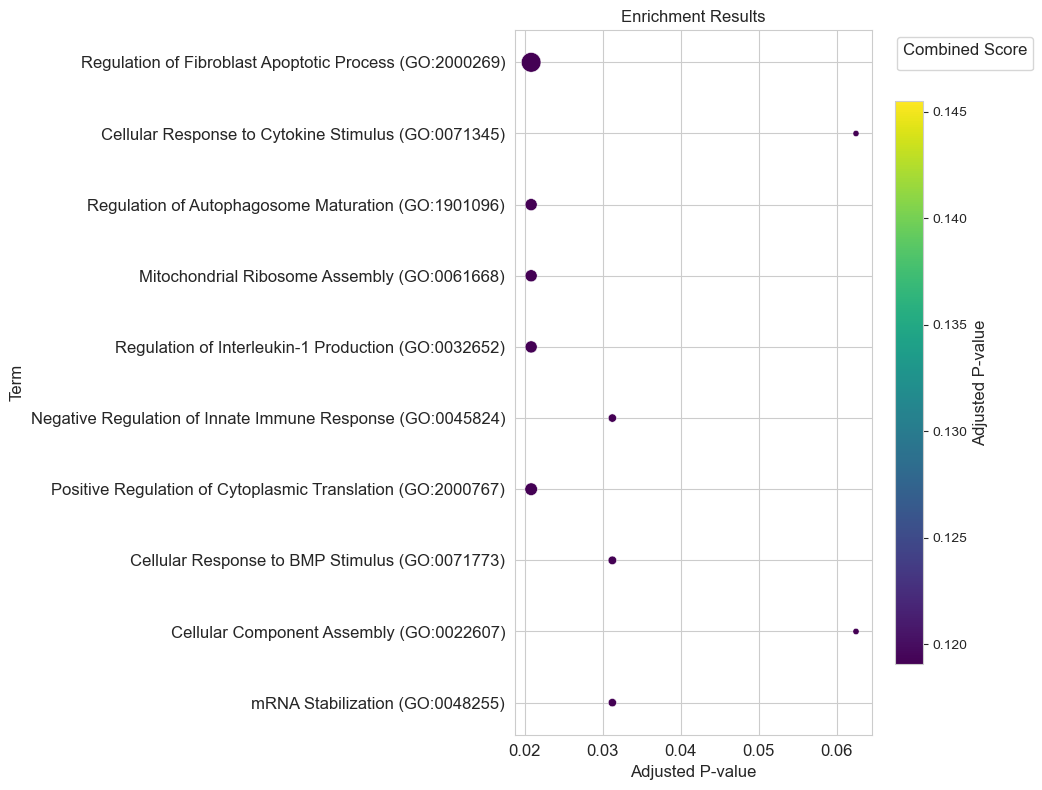

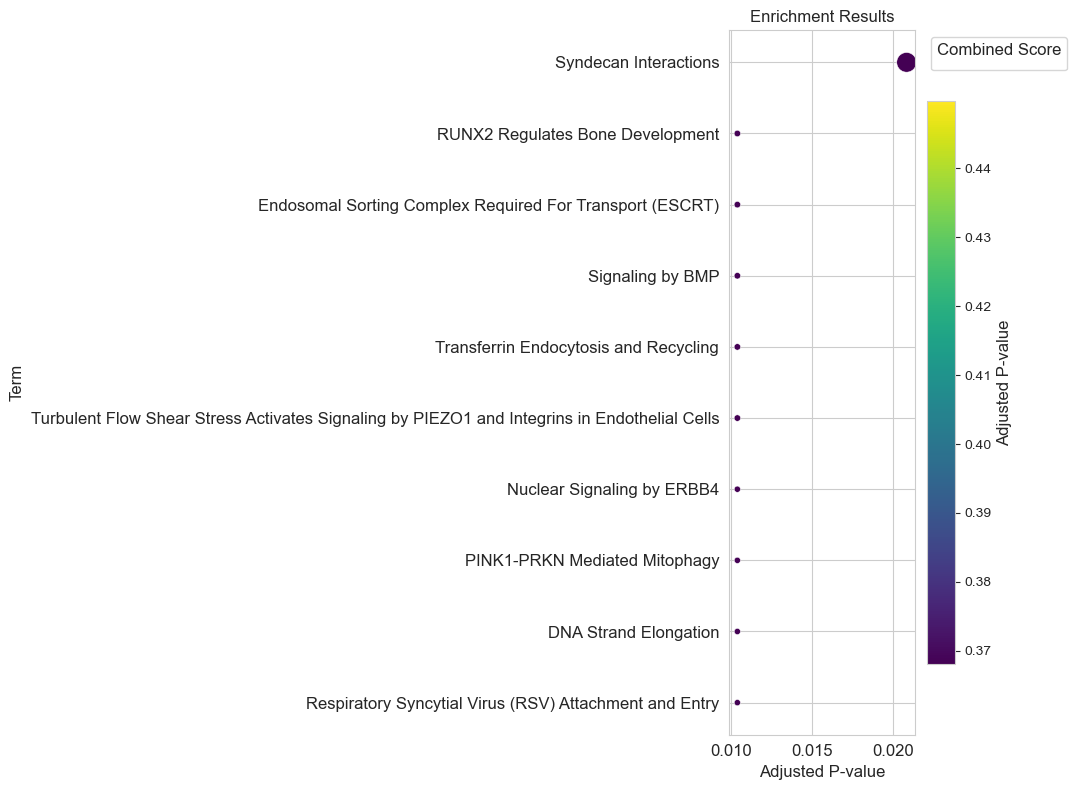

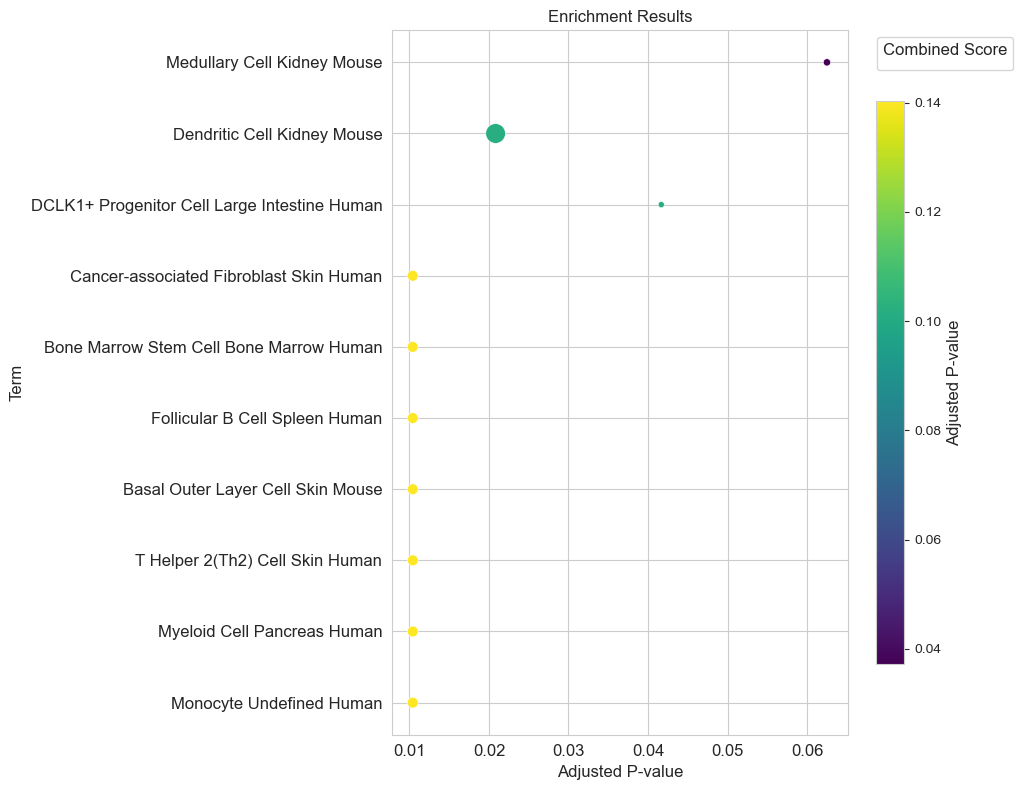

In [162]:
print("HFFC6 small has link, Other cell lines large no link:")
hffc6_small_genes = cell_line_1_small_has_link_other_cell_lines_large_no_link(
    [
        {
            'cell_line': '',
            'data': hffc6_gene_to_closest_avg_enhancer_all,
            'quartile_cat': 'small',
            'has_link': True
        },
        {
            'cell_line': 'GM12878',
            'data': gm12878_gene_to_closest_avg_enhancer_all,
            'quartile_cat': 'large',
            'has_link': False
        },
        {
            'cell_line': 'H1ESC',
            'data': h1esc_gene_to_closest_avg_enhancer_all,
            'quartile_cat': 'large',
            'has_link': False
        }
    ],
    use_quantile_cats=True,
    use_has_link=True
)
print("\n".join(hffc6_small_genes))

dotplot(get_enrichment_results(hffc6_small_genes, gene_sets='GO_Biological_Process_2025')).show()
dotplot(get_enrichment_results(hffc6_small_genes, gene_sets='Reactome_Pathways_2024')).show()
dotplot(get_enrichment_results(hffc6_small_genes, gene_sets='CellMarker_2024')).show()

H1ESC small has link, Other cell lines large no link:
ZNF22
NPIPB12
FOXRED1
ZNF354B
ZNF454
SRPRA
ENHO
HAUS2
TFAP2C
KIAA2012
LGALS12
BOLA2-SMG1P6
PATJ
ZNF562
PCDHA1
SOX13
ZNF525
TIRAP
ADGRF3
KRTAP12-4
PCDHA4
TNRC6A
CRIPTO
LEPROTL1
ACRV1
PHF21B
PCDHB15
CYB561
RAB6C
SERAC1
GFPT2
PCDHA12
ZSCAN4
ZNF835
ZNF550
TSPAN10
KIF12
ZNF506
RNASE6
STAB1
TVP23C-CDRT4
ZNF266
SETX
SALL2
GRM6
LUC7L3
SYT5
SORBS3
CNGB1
ADNP2
PGLYRP1
H2AC13
TEFM
SLX1B
AKNAD1
H2BC13
AFG2A
SPATA22
TVP23C
PCDHA8
PCDHA13
PCDHA6
IFNL1
CST1
ZNF496
PRSS41
NFASC
ALMS1
ZNF549
ARHGEF16
JAG2
IQCF3
BOLA2
NPIPB11
ILVBL
PCDHGA1
SULT1A4
CECR2
PCDHGA2
IQCF6
ZNF253
TIGD7
ZNF766
RASAL3
JPH4
PRR22
NUDT6
ETNK2
ADAP2
CACNG8
PCDHA11
NOVA2
LRRC2
CLIP3
MAP2K3
ZNF749
LRRC57
MROH2A
ZNF391
PRR5
ADGRG3
ZNF75A
NLRC3
ZNF583


/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/2098808767.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  size_legend = ax.legend(
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/2590979485.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  dotplot(get_enrichment_results(h1esc_small_genes, gene_sets='GO_Biological_Process_2025')).show()
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/2098808767.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  size_legend = ax.legend(
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_52622/2590979485.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  dotplot(get_enrichment_r

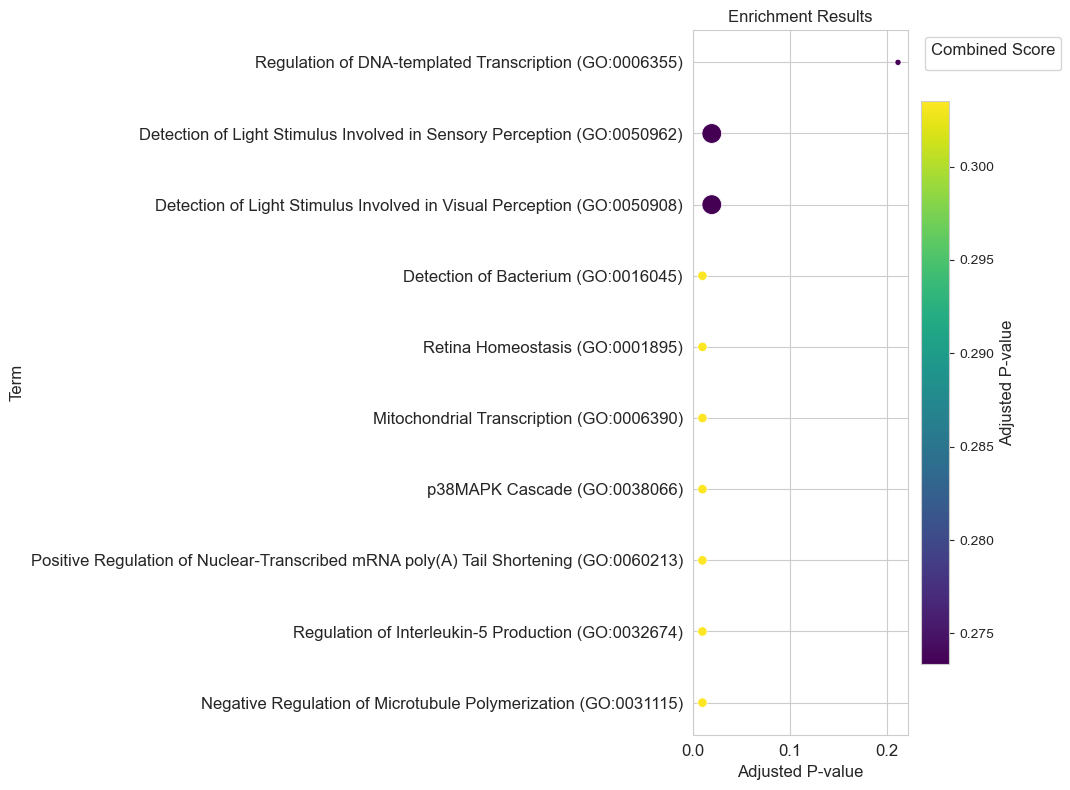

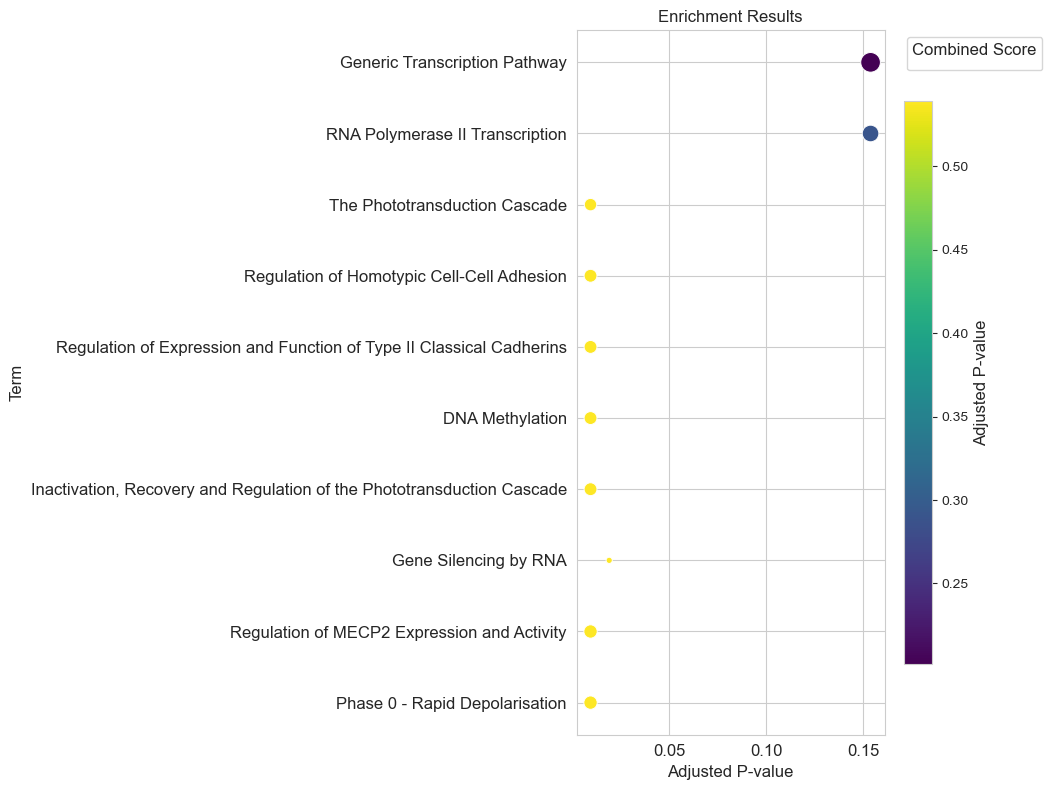

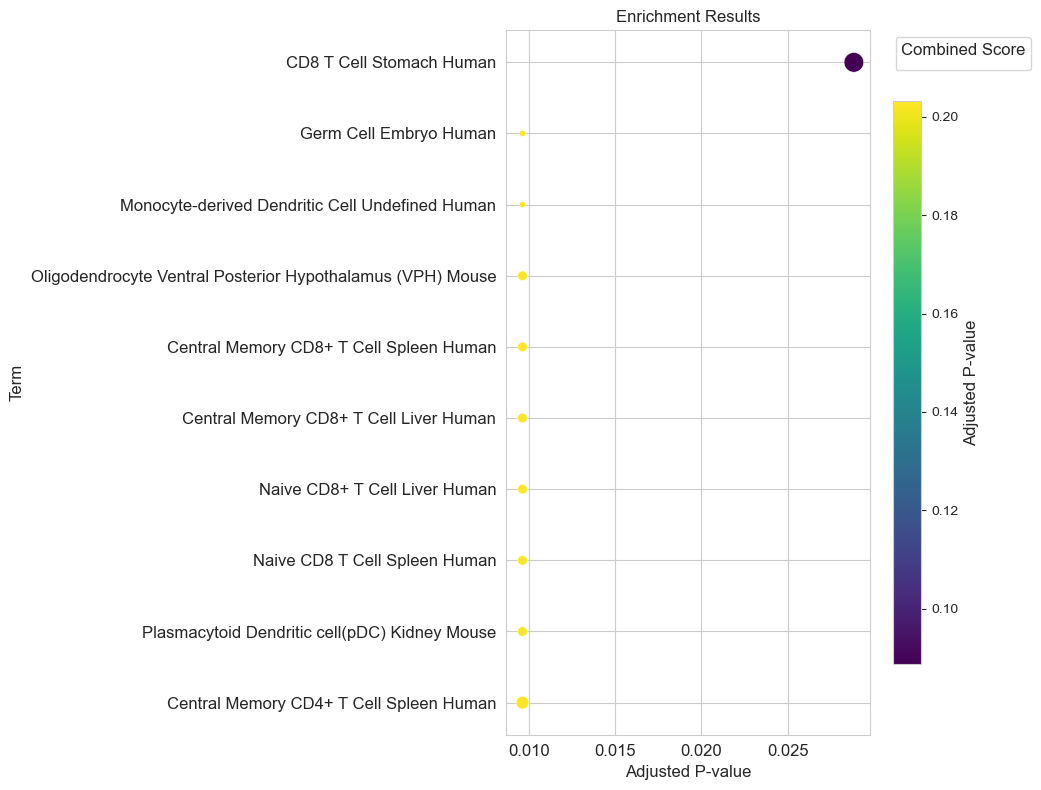

In [163]:
print("H1ESC small has link, Other cell lines large no link:")
h1esc_small_genes = cell_line_1_small_has_link_other_cell_lines_large_no_link(
    [
        {
            'cell_line': '',
            'data': h1esc_gene_to_closest_avg_enhancer_all,
            'quartile_cat': 'small',
            'has_link': True
        },
        {
            'cell_line': 'GM12878',
            'data': gm12878_gene_to_closest_avg_enhancer_all,
            'quartile_cat': 'large',
            'has_link': False
        },
        {
            'cell_line': 'HFFC6',
            'data': hffc6_gene_to_closest_avg_enhancer_all,
            'quartile_cat': 'large',
            'has_link': False
        }
    ],
    use_quantile_cats=True,
    use_has_link=True
)
print("\n".join(h1esc_small_genes))

dotplot(get_enrichment_results(h1esc_small_genes, gene_sets='GO_Biological_Process_2025')).show()
dotplot(get_enrichment_results(h1esc_small_genes, gene_sets='Reactome_Pathways_2024')).show()
dotplot(get_enrichment_results(h1esc_small_genes, gene_sets='CellMarker_2024')).show()